<a href="https://colab.research.google.com/github/SricharanMohanKumar/BrainHack/blob/main/SpotDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convert image to gray scale

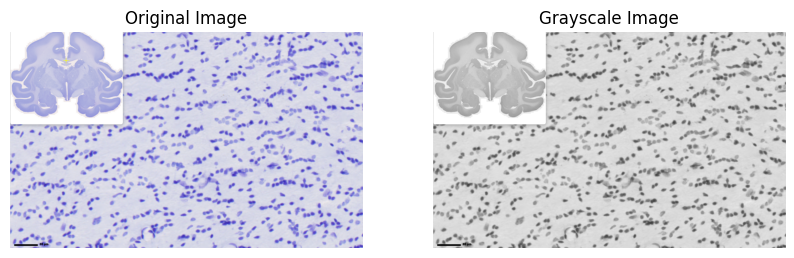

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load the PNG image
image_path = '/content/cc.png'  # Replace 'path_to_your_image.png' with the actual path
img = mpimg.imread(image_path)

# Convert the image to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray_img = rgb2gray(img)

# Display the original and grayscale images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()




Store the converted gray scale image

In [ ]:
from PIL import Image

# Open the image
image = Image.open("/content/cc.png")

# Convert the image to grayscale
grayscale_image = image.convert("L")

# Save the grayscale image
grayscale_image.save("grayscale_image.png")

# Close the original and grayscale images
image.close()
grayscale_image.close()


Thresholding image

(-0.5, 1509.5, 926.5, -0.5)

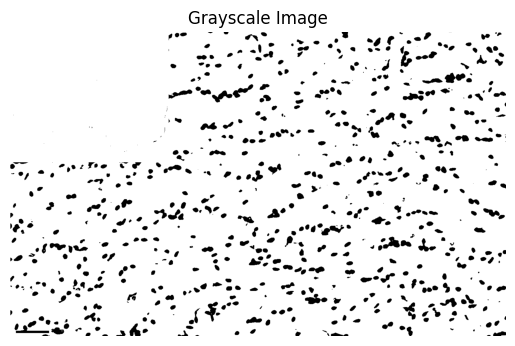

In [ ]:
import cv2
import numpy as np

# Read the grayscale image
image = cv2.imread('grayscale_image.png', cv2.IMREAD_GRAYSCALE)

# Set threshold value
threshold_value = 150  # You can adjust this value as per your requirement

# Apply thresholding
ret, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite('thresholded_image.png', thresholded_image)

plt.imshow(thresholded_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')




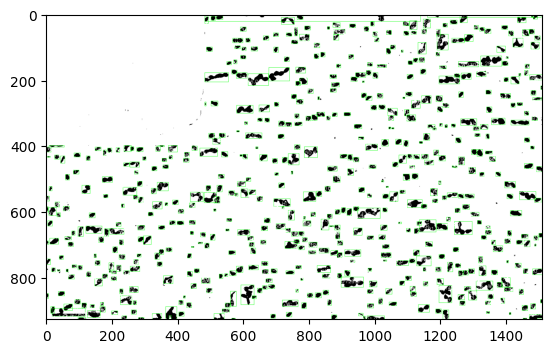

In [ ]:
# Find contours
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)

    # If the area is small, ignore it (remove noise)
    if area < 10:
        continue

    # Get the bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)

    # Draw a rectangle around the contour
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

# Display the result
plt.imshow(image, cmap='gray')



670


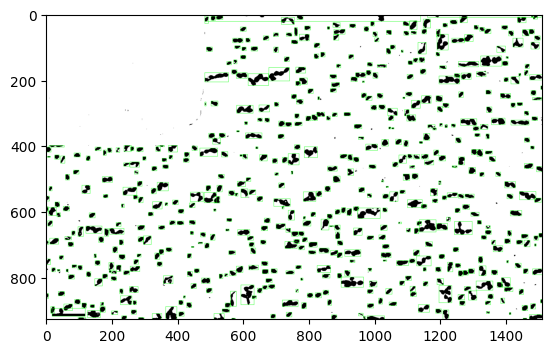

In [ ]:
import cv2

# Load the image
image = cv2.imread('thresholded_image.png')
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply thresholding
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of detected blobs
num_blobs = len(contours)

# Iterate through each contour
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)

    # If the area is small, ignore it (remove noise)
    if area < 10:
        continue

    # Get the bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)

    # Draw a rectangle around the contour
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

print(num_blobs)
plt.imshow(image, cmap='gray')



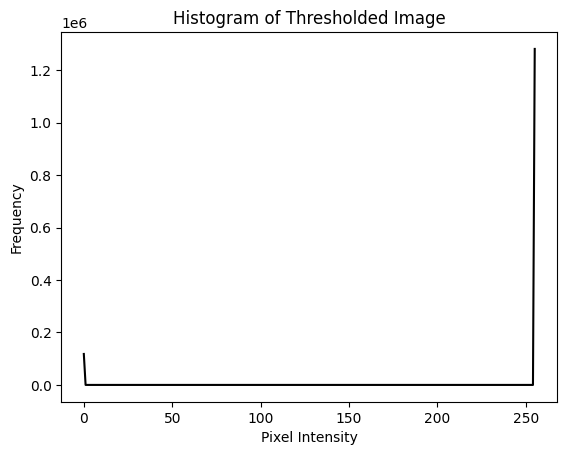

In [ ]:
histogram = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(histogram, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Thresholded Image')

# Display the result
plt.show()

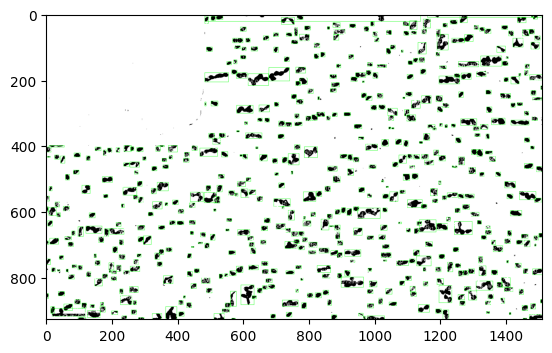

In [ ]:

# Iterate through each contour
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)

    # If the area is small, ignore it (remove noise)
    if area < 10:
        continue

    # Get the bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)

    # Draw a rectangle around the contour
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

    # Write measurements on the image
    cv2.putText(image, f'W: {w}', (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    cv2.putText(image, f'H: {h}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    cv2.putText(image, f'A: {area}', (x, y + h + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

# Display the result
plt.imshow(image, cmap='gray')


In [ ]:
# loop through ROIs to get cell body segmentation masks (binary images)

ROIs = ['putamen', 'caudate', 'gpi', 'gpe', 'lth', 'mth','cc','cortex']

for roiname in ROIs:

    image_name = './' + roiname + '.png' # change image path
    gray_image_name = './' + roiname + '_grayscale.png'
    binary_image_name = './' + roiname + '_binary.png'


    image = Image.open(image_name)

    # Convert the image to grayscale
    grayscale_image = image.convert("L")

    # Save the grayscale image
    grayscale_image.save(gray_image_name)

    # Close the original and grayscale images
    image.close()
    grayscale_image.close()

    # Read the grayscale image
    image = cv2.imread(gray_image_name, cv2.IMREAD_GRAYSCALE)

    # Set threshold value
    threshold_value = 150  # You can adjust this value as per your requirement

    # Apply thresholding
    ret, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Save binary image
    cv2.imwrite(binary_image_name, thresholded_image)


In [ ]:
# get ratio
ROIs = ['putamen', 'caudate', 'gpi', 'gpe', 'lth', 'mth','cc','cortex']

for roiname in ROIs:

    binary_image_name = './' + roiname + '_binary.png'

    # Load the image
    image = cv2.imread(binary_image_name)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    histogram = cv2.calcHist([gray], [0], None, [256], [0, 256])
    print(roiname, histogram[0]/(histogram[0]+histogram[255]))
